In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit

In [3]:
def test(x, a, b):
    return a * x + b * x**2 

In [4]:
resultPath = './results.csv'
results = []
with open(resultPath, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        height = float(row[0].split('[')[-1])
        row2 = row[1].split('|')
        width = float(row2[0].split(']')[0].split(' ')[-1])
        t1 = float(row2[1])
        t2 = float(row2[2])
        row = [height, width, t1, t2]    
        row = list(filter(None, row))
        
        results.append(row)

results = np.array(results)
results = results[results[:,0].argsort()]
resultsW = results[results[:,1].argsort()]
processed_results = results.copy()
processed_results[:,0] = results[:,0] / results[:,0].max()
processed_results[:,1] = results[:,1] / results[:,1].max()

In [5]:
results.shape

(248, 4)

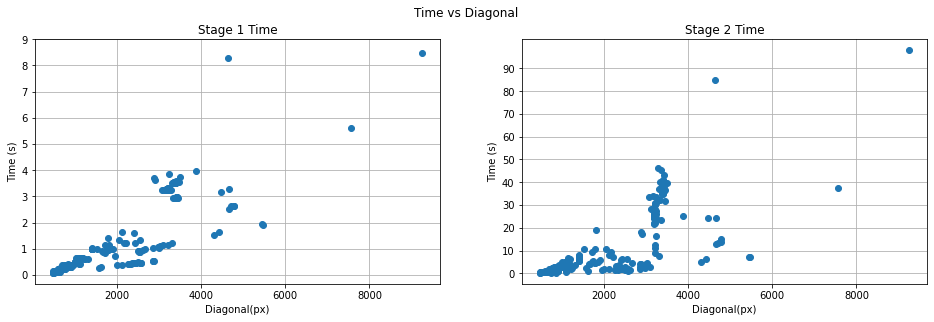

In [6]:
diagonal = np.sqrt(results[:,0]**2 + results[:,1]**2)
resultsD = results[diagonal.argsort()]
diagonal = diagonal[diagonal.argsort()]

estimate, _ = curve_fit(test, diagonal, resultsD[:,2])
estimate2, _ = curve_fit(test, diagonal, resultsD[:,3])

plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
plt.plot(diagonal, resultsD[:,2], 'o')
# plt.plot(diagonal, test(diagonal, *estimate), '-.','r')
plt.grid()
# show more y label
plt.yticks(np.arange(0, 10, 1))
plt.xlabel('Diagonal(px)')
plt.ylabel('Time (s)')
plt.title('Stage 1 Time') 
plt.subplot(1,2,2)
plt.plot(diagonal, resultsD[:,3], 'o')
# plt.plot(diagonal, test(diagonal, *estimate2), '-.','r')
plt.yticks(np.arange(0, 100, 10))
plt.grid()
plt.xlabel('Diagonal(px)')
plt.ylabel('Time (s)')
plt.title('Stage 2 Time')
plt.suptitle('Time vs Diagonal')
plt.savefig('TimeVsDiagonal.png')
plt.show()


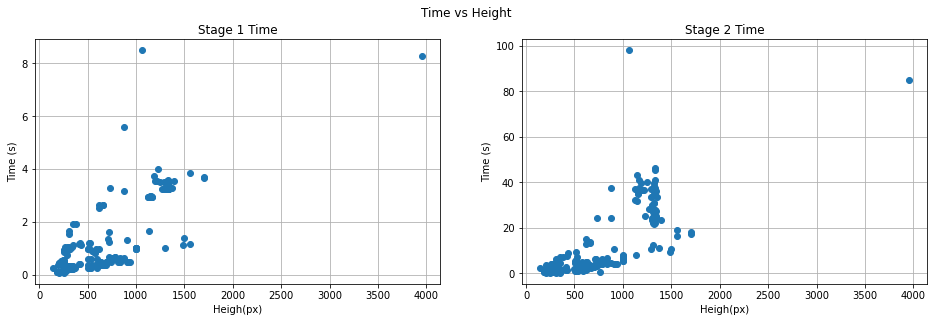

In [7]:
estimate, _ = curve_fit(test, results[:, 0], results[:,2])
estimate2, _ = curve_fit(test, results[:, 0], results[:,3])

plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
plt.plot(results[:, 0], results[:,2], 'o')
# plt.plot(results[:, 0], test(results[:, 0], *estimate), '-.','r')
plt.grid()
plt.xlabel('Heigh(px)')
plt.ylabel('Time (s)')
plt.title('Stage 1 Time') 
plt.subplot(1,2,2)
plt.plot(results[:,0], results[:,3], 'o')
# plt.plot(results[:,0], test(results[:,0], *estimate2), '-.','r')
plt.grid()
plt.xlabel('Heigh(px)')
plt.ylabel('Time (s)')
plt.title('Stage 2 Time')
plt.suptitle('Time vs Height')
plt.savefig('TimeVsHeight.png')
plt.show()

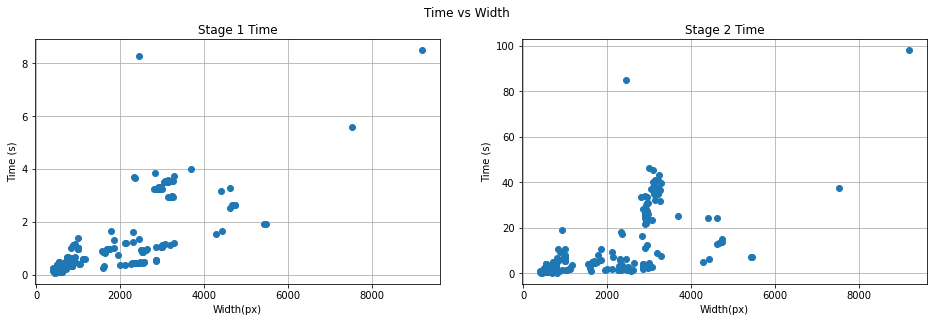

In [8]:
estimate, _ = curve_fit(test, resultsW[:, 1], resultsW[:,2])
estimate2, _ = curve_fit(test, resultsW[:, 1], resultsW[:,3])

plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
plt.plot(resultsW[:, 1], resultsW[:,2], 'o')
# plt.plot(resultsW[:,1], test(resultsW[:,1], *estimate), '-.','r')
plt.grid()
plt.xlabel('Width(px)')
plt.ylabel('Time (s)')
plt.title('Stage 1 Time') 
plt.subplot(1,2,2)
plt.plot(resultsW[:, 1], resultsW[:,3], 'o')
# plt.plot(resultsW[:,1], test(resultsW[:,1], *estimate2), '-.','r')
plt.grid()
plt.xlabel('Width(px)')
plt.ylabel('Time (s)')
plt.title('Stage 2 Time')
plt.suptitle('Time vs Width')
plt.savefig('TimeVsWidth.png')
plt.show()